# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [2]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [ ]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

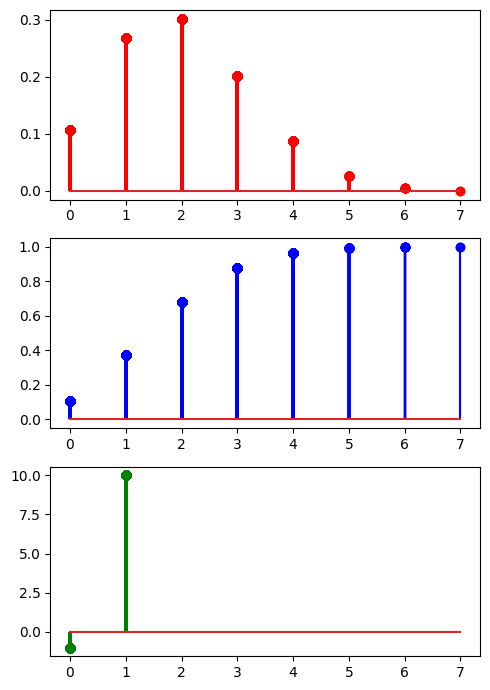

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

## Normales

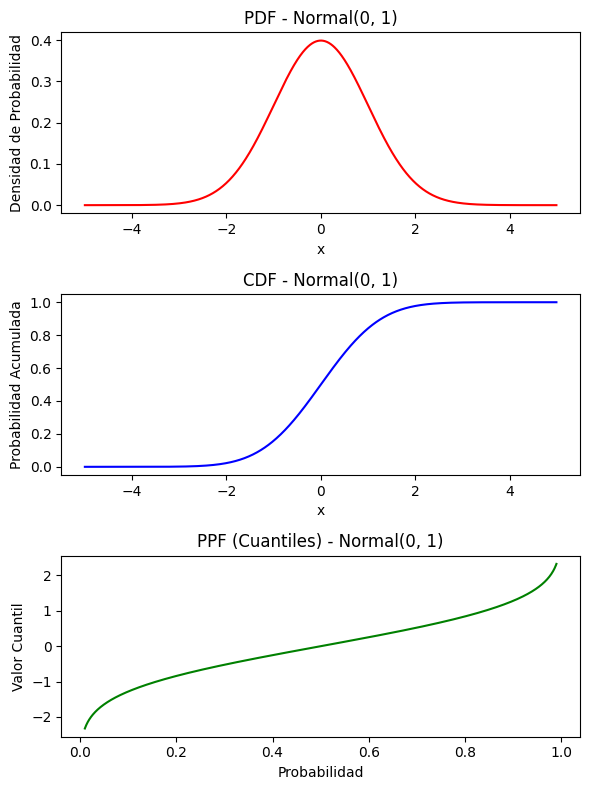

In [13]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Definir funciones de distribución normal
def dnorm(x, mean=0, std=1):
    return norm.pdf(x, loc=mean, scale=std)

def pnorm(x, mean=0, std=1):
    return norm.cdf(x, loc=mean, scale=std)

def qnorm(p, mean=0, std=1):
    return norm.ppf(p, loc=mean, scale=std)

def rnorm(n, mean=0, std=1):
    return norm.rvs(size=n, loc=mean, scale=std)

# Configurar datos para graficar
np.random.seed(42)
mean = 0
std = 1

# Generar datos para PDF y CDF
data = np.arange(-5, 5, 0.01)

# Generar probabilidades para PPF (de 0 a 1)
probabilities = np.linspace(0.01, 0.99, len(data))

# Calcular PDF, CDF, y PPF
pdf_values = dnorm(data, mean=mean, std=std)
cdf_values = pnorm(data, mean=mean, std=std)
ppf_values = qnorm(probabilities, mean=mean, std=std)

# Graficar resultados
fig, axis = plt.subplots(3, 1, figsize=(6, 8))

# Gráfico de PDF
axis[0].plot(data, pdf_values, "r-")
axis[0].set_title("PDF - Normal(0, 1)")
axis[0].set_xlabel("x")
axis[0].set_ylabel("Densidad de Probabilidad")

# Gráfico de CDF
axis[1].plot(data, cdf_values, "b-")
axis[1].set_title("CDF - Normal(0, 1)")
axis[1].set_xlabel("x")
axis[1].set_ylabel("Probabilidad Acumulada")

# Gráfico de PPF
axis[2].plot(probabilities, ppf_values, "g-")
axis[2].set_title("PPF (Cuantiles) - Normal(0, 1)")
axis[2].set_xlabel("Probabilidad")
axis[2].set_ylabel("Valor Cuantil")

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()



## Uniformes

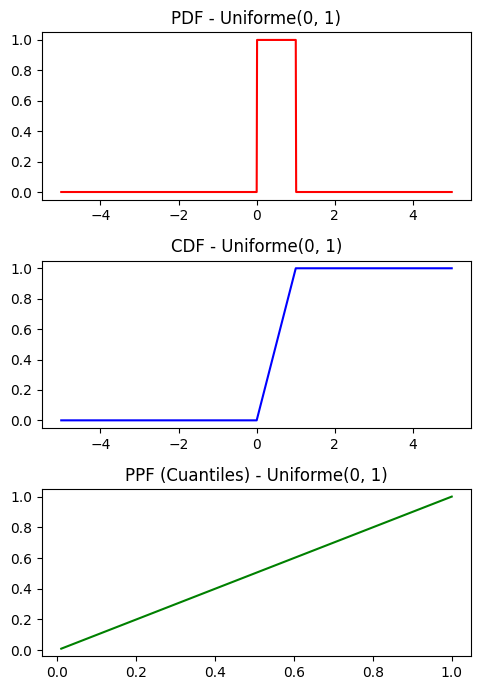

In [16]:
import scipy.stats as stats  # Importación para funciones de distribución uniforme
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

low = 0
high = 1
data = np.arange(-5, 5, 0.01)  

# Utilice las funciones scipy.stats directamente
pmf = stats.uniform.pdf(data, loc=low, scale=high - low)
cdf = stats.uniform.cdf(data, loc=low, scale=high - low)
ppf = stats.uniform.ppf(data, loc=low, scale=high - low)

fig, axis = plt.subplots(3, 1, figsize=(5, 7))

axis[0].plot(data, pmf, "r-")
axis[1].plot(data, cdf, "b-")
axis[2].plot(data, ppf, "g-")

axis[0].set_title("PDF - Uniforme({}, {})".format(low, high))
axis[1].set_title("CDF - Uniforme({}, {})".format(low, high))
axis[2].set_title("PPF (Cuantiles) - Uniforme({}, {})".format(low, high))

# Mostrar gráficos
plt.tight_layout()
plt.show()